# 1. Ładowanie danych i wizualizacja

Pierwszym krokiem jest zaimportowanie wymaganych bibliotek i załadowanie danych. W tym zadaniu użyjemy zestawu danych Pima Indian Diabetes, który jest dostępny w bibliotece scikit-learn.

## 1.1. Importowanie bibliotek

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## 1.2. Załadowanie danych

Dane z zestawu Pima Indian Diabetes załadowane są w formacie numpy array, dlatego musimy przekonwertować je na pandas DataFrame. W tym celu użyjemy funkcji pandas.DataFrame().

In [18]:
# data=load_diabetes(as_frame=True)
data=load_diabetes()
df=pd.DataFrame(data.data, columns=data.feature_names)

## 1.3. Wyświetlmy pierwsze wiersze oraz opis dancyh

Użyjemy dostępnych metod obiektu DataFrame z biblioteki pandas.

In [19]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [20]:
df.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

In [21]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


## 1.4. Wizualizacja danych

Wizualizacja danych pozwala nam zobaczyć zależności między poszczególnymi cechami a diagnozą cukrzycy. W tym celu użyjemy funkcji heatmap z biblioteki seaborn.

In [22]:
corr = df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<AxesSubplot: >

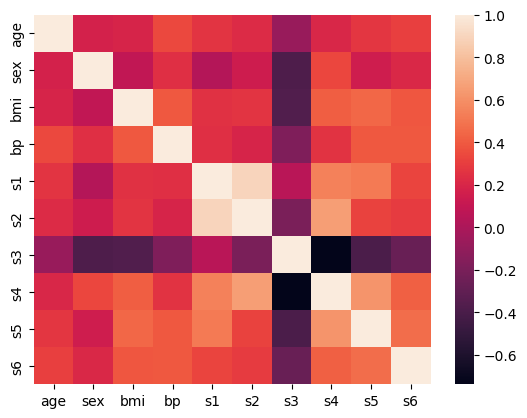

In [23]:
sns.heatmap(corr)

# 2. Przygotowanie danych

## 2.1. Podział danych na zbiór testowy i treningowy

Aby sprawdzić, jak nasz model działa na nowych danych, musimy podzielić nasz zestaw danych na zbiór testowy i treningowy. W tym celu użyjemy funkcji train_test_split z biblioteki scikit-learn.

In [24]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## 2.2. Standaryzacja danych

Standaryzacja danych polega na przeskalowaniu cech tak, aby średnia każdej cechy wynosiła 0

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# 3. Modelowanie

## 3.1. Użycie modelu regresji liniowej z reguralizacją

W tym zadaniu użyj klasyfikatora Ridge z biblioteki scikit-learn. Jest to klasyfikator dla regresji logistycznej z regularyzacją L2.

In [26]:
clf = Ridge()
clf.fit(X_train_scaled, y_train)

Ridge()

### 3.1.1. Sprawdź dokładność modelu na danych testowych, przy użyciu r2_score, dla modelu regresji liniowej.

In [27]:
y_pred_test = clf.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
print(f"r2_score test: {r2_test}")

y_pred_train = clf.predict(X_train_scaled)
r2_train = r2_score(y_train, y_pred_train)
print(f"r2_score train: {r2_train}")

r2_score test: 0.45414652070698247
r2_score train: 0.5276319768458047


## 3.2. Użycie sieci neuronowej z biblioteki Keras

W tym kroku użyjemy biblioteki Keras do zbudowania sieci neuronowej przy użyciu mdodelu Sequential.

In [30]:
import tensorflow as tf
from tensorflow import keras

### 3.2.1 Zwizualizuj funkcję straty w zależności od liczby epok, aby sprawdzić, jak sprawnie sieć neuronowa się uczy

In [31]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=300, batch_size=128, validation_data=(X_test_scaled, y_test))

Epoch 1/300
3/3 [==============================] - 1s 52ms/step - loss: 29648.6562 - val_loss: 26447.7969
Epoch 2/300
3/3 [==============================] - 0s 15ms/step - loss: 29590.0742 - val_loss: 26388.0371
Epoch 3/300
3/3 [==============================] - 0s 17ms/step - loss: 29523.5859 - val_loss: 26324.2383
Epoch 4/300
3/3 [==============================] - 0s 15ms/step - loss: 29454.0176 - val_loss: 26253.1484
Epoch 5/300
3/3 [==============================] - 0s 16ms/step - loss: 29372.9980 - val_loss: 26173.6367
Epoch 6/300
3/3 [==============================] - 0s 16ms/step - loss: 29282.8613 - val_loss: 26085.8223
Epoch 7/300
3/3 [==============================] - 0s 16ms/step - loss: 29184.9824 - val_loss: 25987.1777
Epoch 8/300
3/3 [==============================] - 0s 13ms/step - loss: 29075.9434 - val_loss: 25876.9277
Epoch 9/300
3/3 [==============================] - 0s 14ms/step - loss: 28949.0117 - val_loss: 25752.6094
Epoch 10/300
3/3 [============================

3/3 [==============================] - 0s 13ms/step - loss: 3637.1040 - val_loss: 3783.5583
Epoch 79/300
3/3 [==============================] - 0s 12ms/step - loss: 3603.2781 - val_loss: 3751.2983
Epoch 80/300
3/3 [==============================] - 0s 13ms/step - loss: 3577.5652 - val_loss: 3719.4316
Epoch 81/300
3/3 [==============================] - 0s 12ms/step - loss: 3547.7034 - val_loss: 3691.9790
Epoch 82/300
3/3 [==============================] - 0s 12ms/step - loss: 3521.6628 - val_loss: 3666.0439
Epoch 83/300
3/3 [==============================] - 0s 12ms/step - loss: 3491.5142 - val_loss: 3640.8340
Epoch 84/300
3/3 [==============================] - 0s 13ms/step - loss: 3470.2344 - val_loss: 3617.4629
Epoch 85/300
3/3 [==============================] - 0s 12ms/step - loss: 3443.7727 - val_loss: 3595.2947
Epoch 86/300
3/3 [==============================] - 0s 13ms/step - loss: 3422.4604 - val_loss: 3572.2661
Epoch 87/300
3/3 [==============================] - 0s 13ms/step - l

3/3 [==============================] - 0s 13ms/step - loss: 2732.8789 - val_loss: 2963.2058
Epoch 156/300
3/3 [==============================] - 0s 13ms/step - loss: 2727.9153 - val_loss: 2959.5010
Epoch 157/300
3/3 [==============================] - 0s 12ms/step - loss: 2724.8865 - val_loss: 2956.9421
Epoch 158/300
3/3 [==============================] - 0s 13ms/step - loss: 2720.5859 - val_loss: 2956.1504
Epoch 159/300
3/3 [==============================] - 0s 12ms/step - loss: 2715.6272 - val_loss: 2953.5703
Epoch 160/300
3/3 [==============================] - 0s 13ms/step - loss: 2713.6025 - val_loss: 2949.4810
Epoch 161/300
3/3 [==============================] - 0s 12ms/step - loss: 2707.7705 - val_loss: 2946.0049
Epoch 162/300
3/3 [==============================] - 0s 15ms/step - loss: 2704.3484 - val_loss: 2942.5312
Epoch 163/300
3/3 [==============================] - 0s 13ms/step - loss: 2700.0544 - val_loss: 2940.6929
Epoch 164/300
3/3 [==============================] - 0s 14ms

3/3 [==============================] - 0s 12ms/step - loss: 2505.1968 - val_loss: 2782.9995
Epoch 233/300
3/3 [==============================] - 0s 12ms/step - loss: 2503.0847 - val_loss: 2782.6853
Epoch 234/300
3/3 [==============================] - 0s 14ms/step - loss: 2500.0386 - val_loss: 2783.3889
Epoch 235/300
3/3 [==============================] - 0s 12ms/step - loss: 2497.9709 - val_loss: 2784.2886
Epoch 236/300
3/3 [==============================] - 0s 12ms/step - loss: 2496.9094 - val_loss: 2785.6643
Epoch 237/300
3/3 [==============================] - 0s 13ms/step - loss: 2499.8325 - val_loss: 2781.4448
Epoch 238/300
3/3 [==============================] - 0s 12ms/step - loss: 2491.7285 - val_loss: 2782.3877
Epoch 239/300
3/3 [==============================] - 0s 13ms/step - loss: 2490.5479 - val_loss: 2782.4521
Epoch 240/300
3/3 [==============================] - 0s 11ms/step - loss: 2488.7593 - val_loss: 2779.2332
Epoch 241/300
3/3 [==============================] - 0s 13ms

### 3.2.2. Sprawdź dokładność modelu na danych testowych, przy użyciu r2_score, dla sieci neuronowej.

<AxesSubplot: >

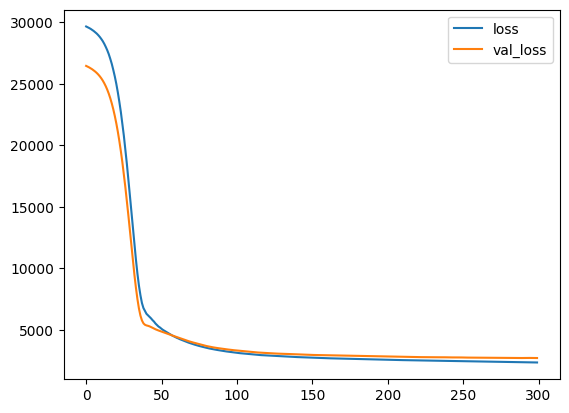

In [32]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [34]:
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test loss:", test_loss)

3/3 [==============================] - 0s 3ms/step - loss: 2723.8384
Test loss: 2723.83837890625


In [38]:
train_loss = model.evaluate(X_train_scaled, y_train)
print('Train loss:', train_loss)

12/12 [==============================] - 0s 2ms/step - loss: 2359.0222
Train loss: 2359.022216796875


# 4. Porównanie dokładności R^2 modeli

R^2 to współczynnik determinacji, który informuje o tym, jak dobrze dopasowany jest model do danych. Wartość R^2 przyjmuje wartości od 0 do 1, gdzie 0 oznacza brak zależności między modelem a danymi, a 1 oznacza idealne dopasowanie modelu do danych.

Modyfikuj tak długo parametry modelu sieci neuronowej (ilość warstw / neuronów, batch_size, funkcje aktywacji, itd.) aż uzyskaż wyższy (lepszy) wynik R^2 niż w przypadku algorytmu regresji liniowej.

In [36]:
prediction = model.predict(X_test_scaled)
r2 = r2_score(prediction, y_pred_test)
print(f"R_2: {r2}")

3/3 [==============================] - 0s 2ms/step
R_2: 0.88682928067207


## 4.1 Narysuj wykres rozproszenia, gdzie oś X przedstawia rzeczywiste wartości y, a oś Y przedstawia przewidywane wartości y przez oba modele.

Taki wykres pozwala porównać, jak dobrze modele radzą sobie z przewidywaniem rzeczywistych wartości y. Im bardziej punkty na wykresie są skupione wzdłuż linii prostej y=x, tym lepiej model przewiduje rzeczywiste wartości.

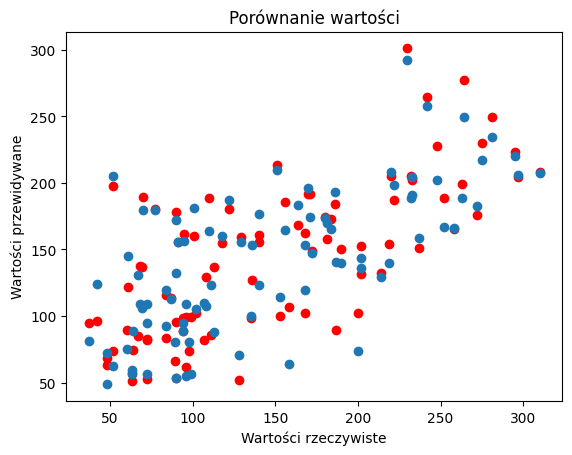

In [37]:
plt.scatter(y_test, prediction, c='red')
plt.scatter(y_test, y_pred_test)
plt.xlabel("Wartości rzeczywiste")
plt.ylabel("Wartości przewidywane")
plt.title("Porównanie wartości")
plt.show()